In [15]:
# Team Pi Monty Hall Simulation by Team Pi: Teng Gao, Zhaohua Huang

In [16]:
from random import randint
import random
import seaborn as sns

In [17]:
#intiallize simulation, return key values
def monty_hall():
    
    """define a function for similation of monty hall game
    this function will return results 
    in Car Hidden, First Choice, Monty Open, Second Choice, Winfirst, WinSwitch 
    for one simulation
    """
    
    # randomly select a door which has a car
    car_hidden=randint(1,3) 
    # randomly made the first choice
    first_choice=randint(1,3)
    #initialize three doors
    doors=[1,2,3] 
    # Monty won't show the door with car
    doors.remove(car_hidden)
    
    # if contestant pick the door with goat,monty has only one choice
    if first_choice!= car_hidden:
        doors.remove(first_choice)
        monty_open= doors[0]
        second_choice=car_hidden
        
    #contestant pick the door with car, then monty has two other choice to open a door
    else:
        monty_open=random.choice(doors) # monty randomly pick from the other two doors
        doors.remove(monty_open)
        second_choice=doors[0] # the other choice in this situation
    if first_choice==car_hidden:
        winfirst='yes'
    else:
        winfirst=' '
        
        # count constestant second choice win times    
    if second_choice==car_hidden:
        winswitch='yes'
    else:
        winswitch=' '

    return car_hidden,first_choice, monty_open, second_choice, winfirst, winswitch

In [18]:
# print out simulation results
def simulation(count):
    l_winfirst=[]
    l_winswitch=[]
    title = ('Index|','Car Hidden Here|','Your First Choice|', 'Monty Opended Door|', 'Your Second Choice|', 'Win if Stay|', 'Win if Switch')
    print (f'{title[0]:7}{title[1]:15}{title[2]:19}{title[3]:20}{title[4]:20}{title[5]:14}{title[6]:15}')
    for i in range(count):
        car_hidden,first_choice, monty_open, second_choice, winfirst, winswitch=monty_hall() #return the result columns
        l_winfirst.append(winfirst)
        l_winswitch.append(winswitch)
        print (f'{i+1:>3}{car_hidden:>14} {first_choice:>13} {monty_open:>20} {second_choice: >18} {winfirst:>16} {winswitch:>16}')
    count_winfirst=l_winfirst.count('yes')
    count_winswitch=l_winswitch.count('yes')
    print (f'{count_winfirst} wins if you stayed with your first choice')
    print (f'{count_winswitch} wins if you switch to your second choice')
    print(f'Win ratio of switching over starying: {count_winswitch/(count_winfirst):.2f}')
    return  count_winfirst,count_winswitch

In [19]:
# run the simulation, out put result
def show_result(count):
    count_winfirst,count_winswitch=simulation(count) # return two lists of win first and win switch result
    sns.set_style('whitegrid')
    stay_percentage=count_winfirst/(count_winfirst+count_winswitch)
    switch_percentage=count_winswitch/(count_winfirst+count_winswitch)
    montyhall = sns.barplot(x =["Stay","Switch"],y =[stay_percentage*100,switch_percentage*100])
    montyhall.set_title(f'Stay vs.Switch Win Percentage after {count} Simulations ')
    montyhall.set(ylabel='Percentage')
    montyhall.set_ylim(top=100)
    toppers=[f'{stay_percentage:.0%}',f'{switch_percentage:.0%}']
    for bar, topper in zip(montyhall.patches,toppers):
            text_x = bar.get_x() + bar.get_width() / 2
            text_y = bar.get_height()
            montyhall.text(text_x, text_y, topper,
                      fontsize=11, ha='center', va='bottom')
    

Index| Car Hidden Here|Your First Choice| Monty Opended Door| Your Second Choice| Win if Stay|  Win if Switch  
  1             1             3                    2                  1                               yes
  2             1             2                    3                  1                               yes
  3             2             3                    1                  2                               yes
  4             1             1                    3                  2              yes                 
  5             1             1                    2                  3              yes                 
  6             2             2                    1                  3              yes                 
  7             1             2                    3                  1                               yes
  8             2             1                    3                  2                               yes
  9             1             1         

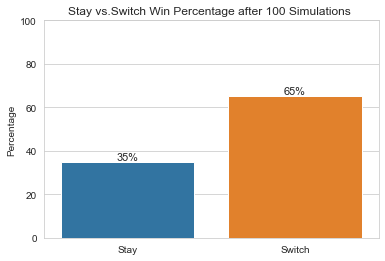

In [22]:
show_result(100)